## In this Notebook we will be followup our exploration with some preprocessing now that we know what the data looks like!

edit: so I read the documentation for the data and turns out it was scaled and cleaned for us already so the steps below feel kinda stupid or redundant but hey, good practice i guess!

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # This is for us to randomly divide up our training and test sets
from sklearn.preprocessing import MinMaxScaler # This is for normalization, not needed here but for our reference
from sklearn.preprocessing import StandardScaler # This is for Standardization

##### Now that we have imported the relavant Packages, we will do some simple transformations to our dataset from our learning in the first ipynb labelled 1.0-sh-initial-apples-exploration.ipynb 
---

This ensures we have a clean dataset to do some prediction and modelling on.

In [10]:
df_original = pd.read_csv('../data/raw/apple_quality.csv')
df = df_original.drop([4000])
df = df.set_index('A_id')
df["Acidity"] = df.Acidity.astype(float)
df.Quality = df.Quality.replace(to_replace=['good', 'bad'], value=[1, 0])
df['Quality']=df['Quality'].astype(float)

### Now we can run some preprocessing, the main thing that needs to be done is make note of any featuree scaling that we would want to perform here.

Since all the features here follow a relatively Guassian distribution it makes sense for us to standardize! 

---

1.  Note we would normalize only when we want to preserve the distribution of the original dataset in order for the model to learn from it. Typically for Neural nets! Also normalization is for when we have drastically different scales in our X's but in our case all the X values tend to be between -5 and 5. So a relatively similar scale.

2.  Standardization on the other hand is preferred when either the data follows a guassian distribution or when there are a lot of outliers we need to standardize for. 
If it Guassian and no outliers then we don't really need to do either! But in the end of the previous notebook we saw around a 100 rows had significant outlier's in them. i.e. features with Z scores > 3!

> Lastly as a final note we only need to perform feature scaling on our X's. Small thing to keep in mind!

In [11]:
y = df['Quality'].to_numpy()
X_original = df.drop('Quality', axis=1)

display(X_original)

# TODO: Standardize the different columns for X, no need to normalize as in the previous notebook we saw the data followed a relatively normal distribution

scaler = StandardScaler()
x_standardized = scaler.fit_transform(X_original)

print('Below is our output after Standardizing:')
display(x_standardized) # Note after sclaing its just a Numpy Array! We need to make it into a pandas DF

x = pd.DataFrame(x_standardized, columns=X_original.columns) # Make a dataframe with the same Column names as our X_original

display(x)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
A_id,,,,,,,
0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611


Below is our output after Standardizing:


array([[-1.79842417, -0.95037339,  2.99342063, ...,  0.69054495,
        -0.08987211, -0.26941526],
       [-0.35906018, -1.15440431,  2.12769769, ...,  0.17676683,
         0.1970196 , -0.37899737],
       [ 0.1094454 , -0.22575916, -0.65250727, ...,  1.20542179,
        -0.28615565,  1.20604367],
       ...,
       [-1.1056547 , -0.71690397, -1.01378401, ...,  0.87437918,
         2.27595716, -0.66895013],
       [-1.81811235, -0.49290842,  1.45990059, ...,  0.85454883,
        -0.15141937, -1.09317096],
       [ 0.40540882, -0.45307081,  0.30449592, ...,  0.39095445,
        -0.68021237,  0.72176064]])

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472
...,...,...,...,...,...,...,...
3995,0.291729,-0.048594,-1.669449,-0.365345,0.614425,0.931482,0.028866
3996,0.108878,1.834105,0.137124,-1.159058,-0.252634,-0.846326,0.842347
3997,-1.105655,-0.716904,-1.013784,-0.234036,0.874379,2.275957,-0.668950
3998,-1.818112,-0.492908,1.459901,-0.845446,0.854549,-0.151419,-1.093171


Well now that we have standardized our X, just for visualization purposes, lets look at how it's changed in a plot!

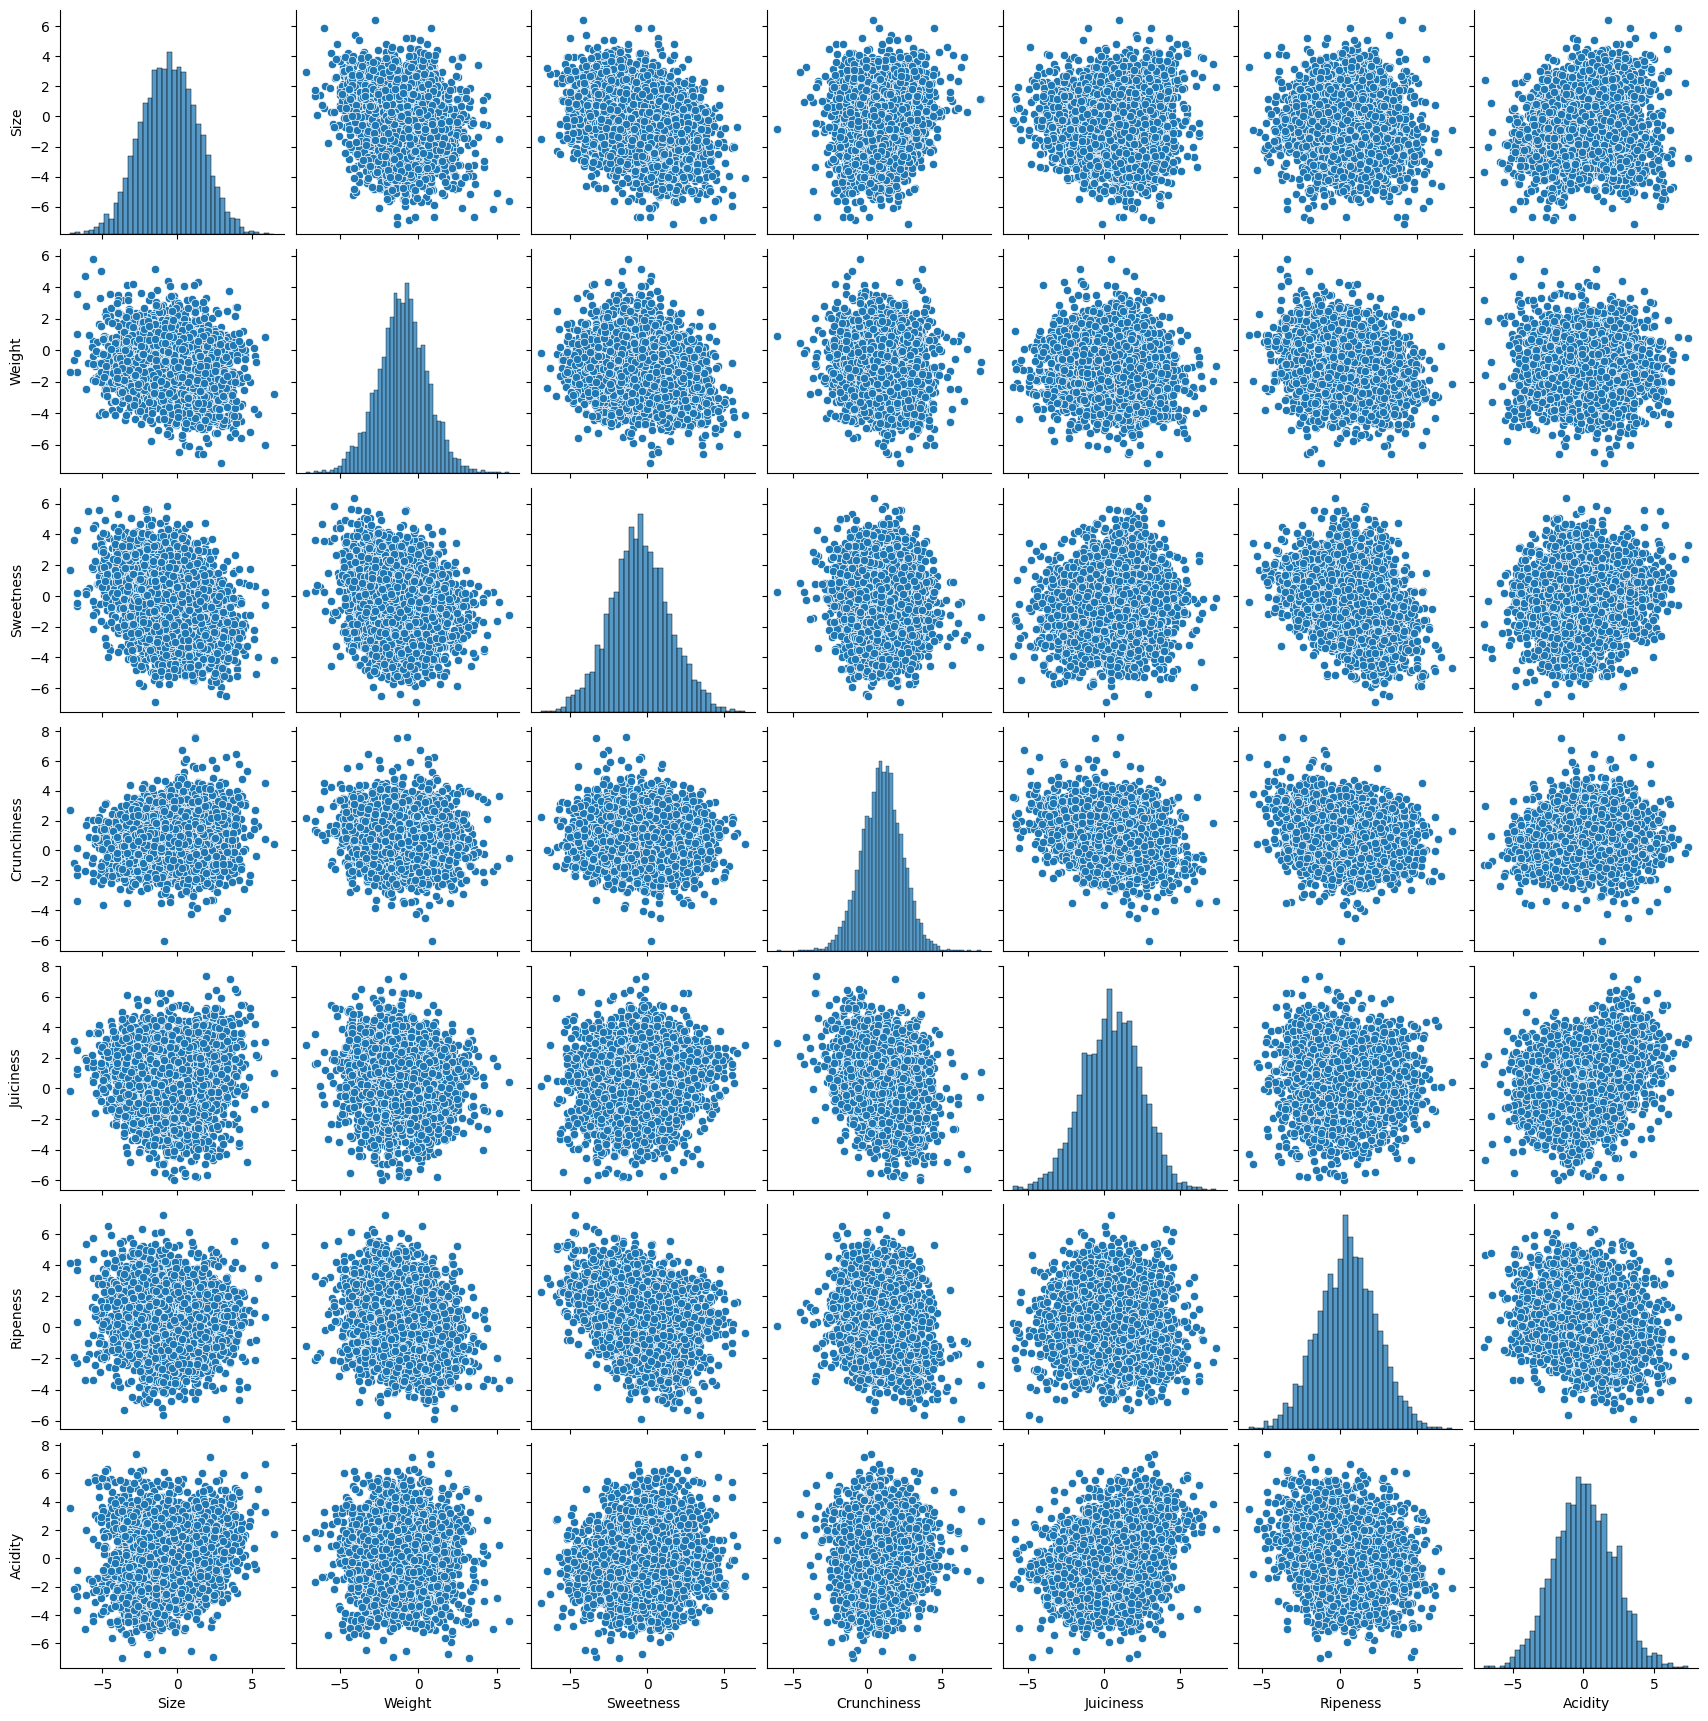

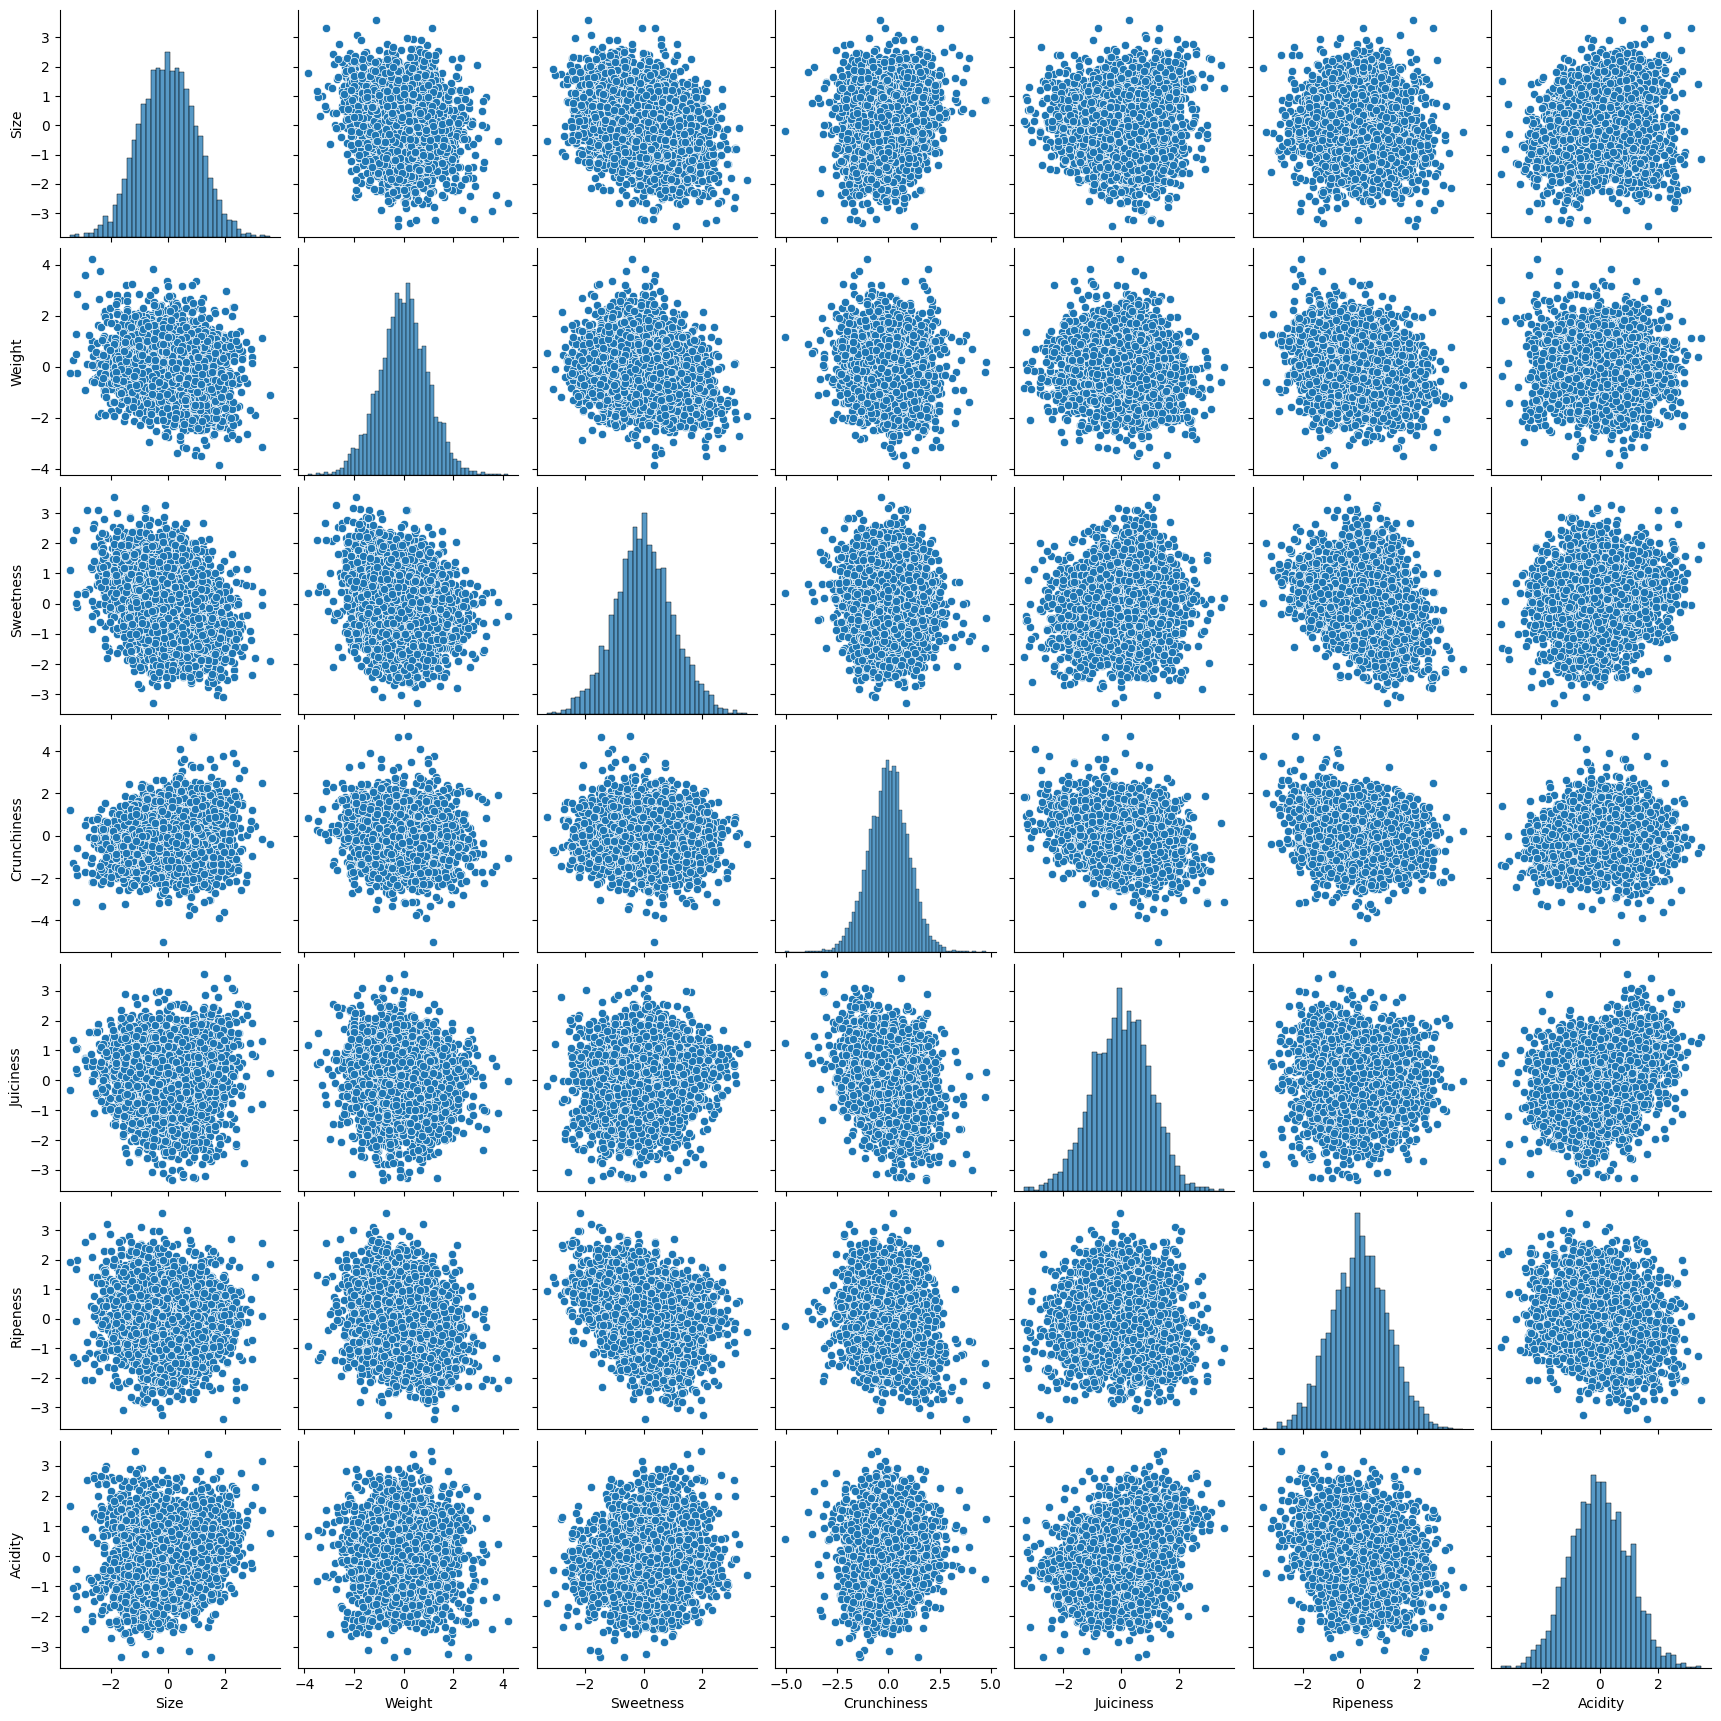

In [12]:
sns.pairplot(X_original)

sns.pairplot(x)

##### Hmm in hindsight all we have done is scaled the distributions from a -5 to 5 scale down to a -3 to 3 scale. Therefore maybe a redundant step buit at least above is a good way to learn about some basic feature scaling for next time!

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
print(x_train.shape)
print(x_test.shape)

(3200, 7)
(800, 7)


### Okay now we are all setup for some modelling! Typically you import all your relavant packages at the top but for clarity I'll do it here so we can clearly differenciate modelling and preprocessing

In [64]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy           import DummyClassifier
from sklearn.ensemble        import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model    import SGDClassifier
from sklearn.metrics         import classification_report
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.neural_network  import MLPClassifier
from sklearn.svm             import SVC
import lightgbm as lgb


import warnings
warnings.filterwarnings("ignore")


In [65]:
def acc_score(model):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    return print('MAE:', accuracy_score(y_test, y_preds))


In [66]:
scores = cross_val_score(DummyClassifier(), x_train, y_train, cv=10, scoring="accuracy")
print(f'Mean accuracy: {np.mean(scores):.2f}')

acc_score(DummyClassifier())

Mean accuracy: 0.50
MAE: 0.49875


In [67]:
scores = cross_val_score(SGDClassifier(), x_train, y_train, cv=5, scoring="accuracy")
print(f'Mean accuracy: {np.mean(scores):.2f}')

acc_score(SGDClassifier())

Mean accuracy: 0.73
MAE: 0.71875


In [68]:
scores = cross_val_score(SVC(), x_train, y_train, cv=5, scoring="accuracy")
print(f'Mean accuracy: {np.mean(scores):.2f}')

acc_score(SVC())

Mean accuracy: 0.89
MAE: 0.90375


In [69]:
scores = cross_val_score(RandomForestClassifier(n_estimators=500), x_train, y_train, cv=5, scoring="accuracy")
print(f'Mean accuracy: {np.mean(scores):.2f}')

acc_score(RandomForestClassifier(n_estimators=500))

Mean accuracy: 0.88
MAE: 0.91375


In [70]:
scores = cross_val_score(RandomForestClassifier(n_estimators=30), x_train, y_train, cv=5, scoring="accuracy")
print(f'Mean accuracy: {np.mean(scores):.2f}')

acc_score(RandomForestClassifier(n_estimators=30))

Mean accuracy: 0.87
MAE: 0.89125


In [71]:
scores = cross_val_score(XGBClassifier(n_estimators=500), x_train, y_train, cv=5, scoring="accuracy")
print(f'Mean accuracy: {np.mean(scores):.2f}')

acc_score(XGBClassifier(n_estimators=500))

Mean accuracy: 0.88
MAE: 0.9125


In [72]:
scores = cross_val_score(ExtraTreesClassifier(), x_train, y_train, cv=5, scoring="accuracy")
print(f'Mean accuracy: {np.mean(scores):.2f}')

acc_score(ExtraTreesClassifier())

Mean accuracy: 0.89
MAE: 0.905


In [73]:
scores = cross_val_score(lgb.LGBMClassifier(force_col_wise=True), x_train, y_train, cv=5, scoring="accuracy")
print(f'Mean accuracy: {np.mean(scores):.2f}')

acc_score(lgb.LGBMClassifier())

[LightGBM] [Info] Number of positive: 1284, number of negative: 1276
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501563 -> initscore=0.006250
[LightGBM] [Info] Start training from score 0.006250
[LightGBM] [Info] Number of positive: 1284, number of negative: 1276
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501563 -> initscore=0.006250
[LightGBM] [Info] Start training from score 0.006250
[LightGBM] [Info] Number of positive: 1284, number of negative: 1276
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501563 -> initscore=0.006250
[LightGBM] [Info] Start training from score 0.006250
[LightGBM] [Info] Numb

In [74]:
scores = cross_val_score(MLPClassifier(max_iter=500, early_stopping=True), x_train, y_train, cv=5, scoring="accuracy")
print(f'Mean accuracy: {np.mean(scores):.2f}')

acc_score(MLPClassifier(max_iter=500, early_stopping=True))

Mean accuracy: 0.86
MAE: 0.88125


In [75]:
params = {'hidden_layer_sizes':[(10,), (100, 10), (200, 100, 10), (300, 200, 100)],
          'activation': ['identity', 'logistic', 'tanh', 'relu'],
          'solver': ['sgd', 'adam'],
          'learning_rate_init': np.arange(0.0001, 1, 0.01),
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'alpha': np.arange(0.0001, 1, 0.01),}

rs = RandomizedSearchCV(MLPClassifier(max_iter=500, early_stopping=True), params, n_iter=30, cv=5, scoring='accuracy', verbose=False)
rs.fit(x_train, y_train)

print(f'The best hyperparameters are: {rs.best_params_}')
model = rs.best_estimator_

The best hyperparameters are: {'solver': 'sgd', 'learning_rate_init': 0.8601, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 10), 'alpha': 0.2701, 'activation': 'tanh'}


In [76]:
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1595
         1.0       0.95      0.96      0.96      1605

    accuracy                           0.96      3200
   macro avg       0.96      0.96      0.96      3200
weighted avg       0.96      0.96      0.96      3200



In [77]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       401
         1.0       0.93      0.95      0.94       399

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800

